In [1]:
##Getting things set up
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
import matplotlib.pyplot as plt
import time
#import numpy as np



In [53]:
##Defining 3 optimzation problems###
#1- four peaks
length1=10
fitness_fn1= mlrose.FourPeaks()
optprob1= mlrose.DiscreteOpt(length1,fitness_fn1)

#2- sum of the 1 values
length2=10
fitness_fn2= mlrose.OneMax()
optprob2= mlrose.DiscreteOpt(length2,fitness_fn2) ##Should this be continuous???

#3- maxKcolor
length3=10
edges= [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,0), (0,8), (8,1), (8,2), (8,5), (8,6), (8,7), (9, 2), (9,3), (9,4), (9,5)]
fitness_fn3= mlrose.MaxKColor(edges)
optprob3=mlrose.DiscreteOpt(length3,fitness_fn3, maximize=False, max_val=3)

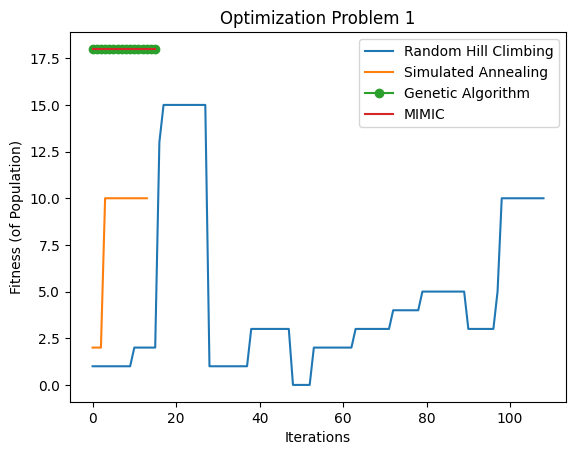

time for random hill-climbing is 0.010317802429199219
time for simulated annealing is 0.0007519721984863281
time for genetic algorithm is 0.28818321228027344
time for mimic is 0.8516008853912354


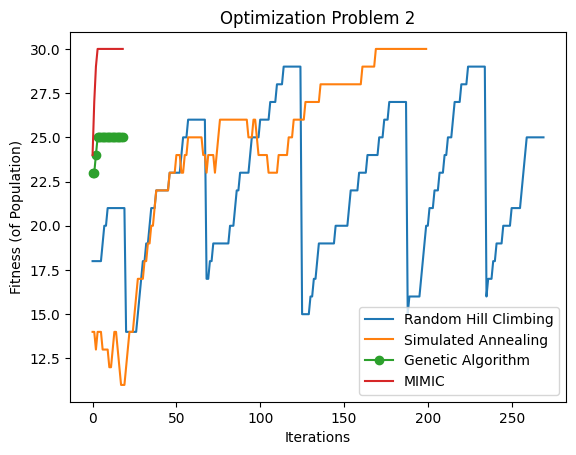

time for random hill-climbing is 0.010035037994384766
time for simulated annealing is 0.0062830448150634766
time for genetic algorithm is 0.4013969898223877
time for mimic is 8.027199983596802


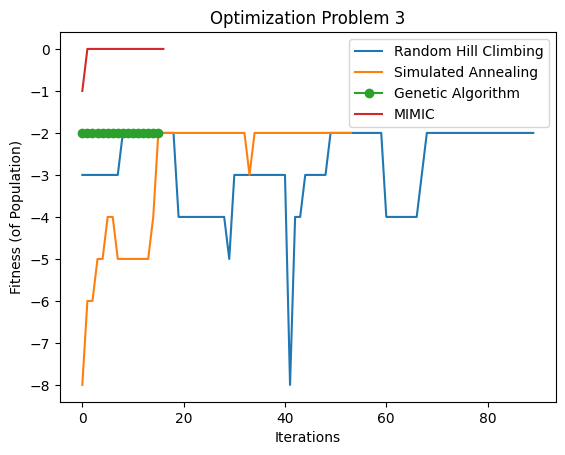

time for random hill-climbing is 0.003931760787963867
time for simulated annealing is 0.0023109912872314453
time for genetic algorithm is 0.32727694511413574
time for mimic is 0.9434571266174316


In [86]:
#iterate to keep it simple
n=1
for optprob in [optprob1, optprob2, optprob3]:
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211, max_attempts=optprob.length)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.1, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212, max_attempts=15) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve, '-o')
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Optimization Problem " + str(n))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1


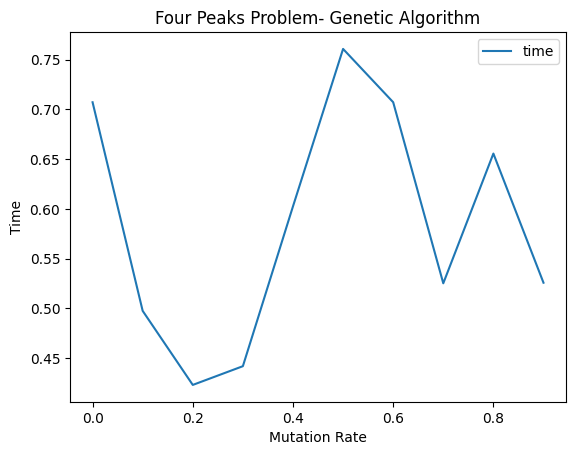

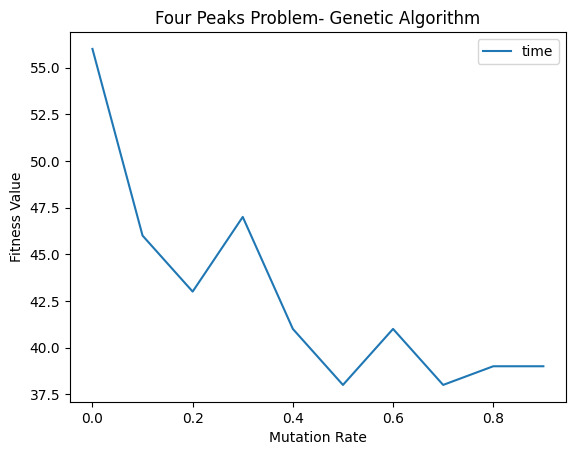

In [104]:
#1- four peaks
length1=30
fitness_fn1= mlrose.FourPeaks()
optprob= mlrose.DiscreteOpt(length1,fitness_fn1)

timelist=[]
mutvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
bestfitlist=[]
for mut in mutvals:
    #time0=time.time()
    #[beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    #time1=time.time()
    #[beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= mut, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    #[beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    #time4=time.time()

    #Graph it
    timeval=time3-time2
    timelist.append(timeval)
    bestfitlist.append(bestfitga)

import matplotlib.pyplot as plt
plt.plot(mutvals, timelist)
plt.legend(["time"])
plt.xlabel("Mutation Rate")
plt.ylabel("Time")
plt.title("Four Peaks Problem- Genetic Algorithm")
plt.show()
plt.plot(mutvals, bestfitlist)
plt.legend(["time"])
plt.xlabel("Mutation Rate")
plt.ylabel("Fitness Value")
plt.title("Four Peaks Problem- Genetic Algorithm")
plt.show()




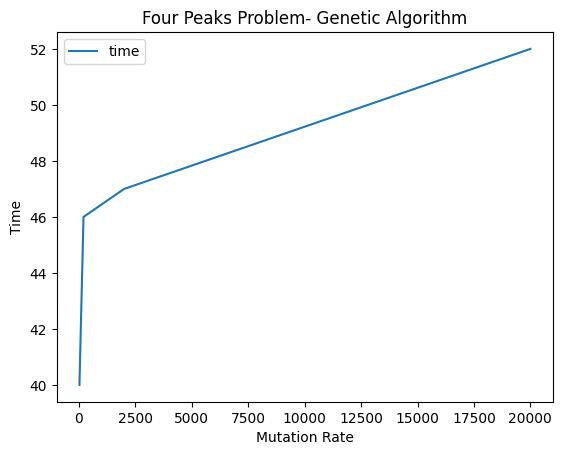

In [37]:

popvals=[20,200,2000,20000]
vallist=[]
for pop in popvals:
    #time0=time.time()
    #[beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    #time1=time.time()
    #[beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.1, pop_size= pop, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    #[beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    #time4=time.time()

    #Graph it
    vallist.append(bestfitga)

plt.plot(popvals, vallist)
plt.legend(["time"])
plt.xlabel("Population Size")
plt.ylabel("Fitness of Population")
plt.title("Four Peaks Problem- Genetic Algorithm")
plt.show()

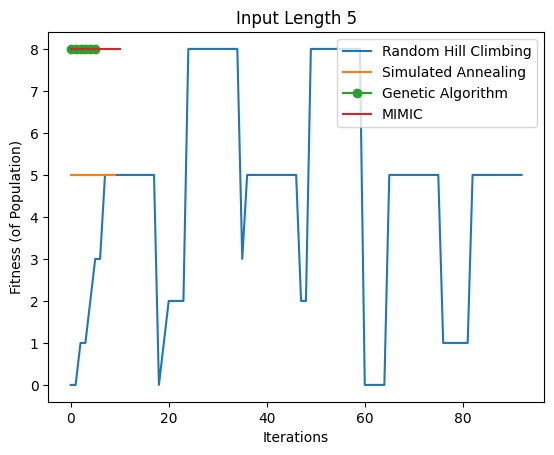

time for random hill-climbing is 0.0035812854766845703
time for simulated annealing is 0.0006148815155029297
time for genetic algorithm is 0.19900298118591309
time for mimic is 0.1457829475402832


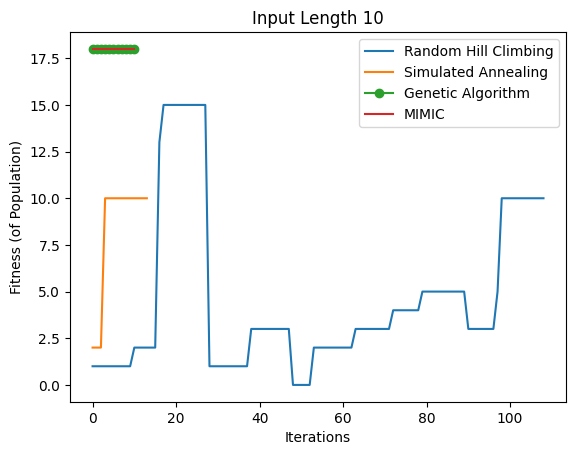

time for random hill-climbing is 0.002802133560180664
time for simulated annealing is 0.0004169940948486328
time for genetic algorithm is 0.1932997703552246
time for mimic is 0.541762113571167


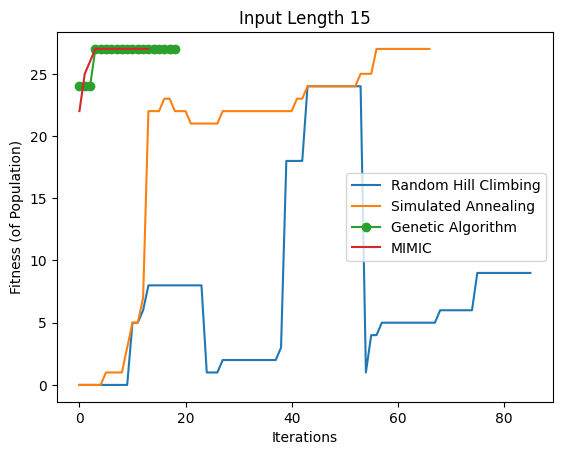

time for random hill-climbing is 0.0021517276763916016
time for simulated annealing is 0.0019462108612060547
time for genetic algorithm is 0.3355400562286377
time for mimic is 1.6055107116699219


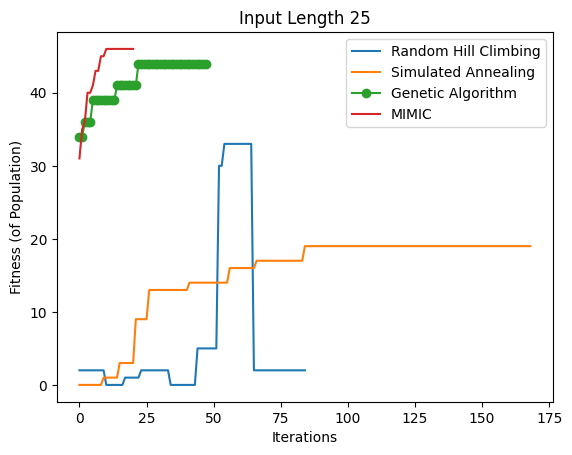

time for random hill-climbing is 0.0020751953125
time for simulated annealing is 0.00618290901184082
time for genetic algorithm is 0.8545258045196533
time for mimic is 6.505327224731445


In [73]:
#iterate to keep it simple
n=1
lengths=[5, 10, 15, 25]
for length in lengths:
    fitness_fn1= mlrose.FourPeaks()
    optprob= mlrose.DiscreteOpt(length,fitness_fn1)
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.1,  curve=True, max_attempts= length,random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve, '-o')
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Input Length " + str(length))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1

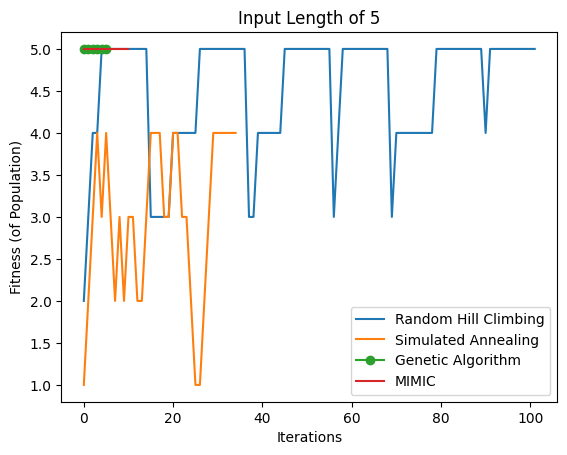

time for random hill-climbing is 0.007302761077880859
time for simulated annealing is 0.0023202896118164062
time for genetic algorithm is 0.11906671524047852
time for mimic is 0.1502542495727539


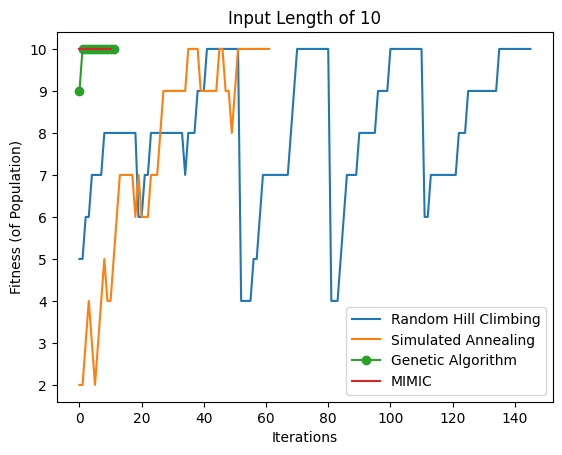

time for random hill-climbing is 0.004354000091552734
time for simulated annealing is 0.0027048587799072266
time for genetic algorithm is 0.28188633918762207
time for mimic is 0.5898618698120117


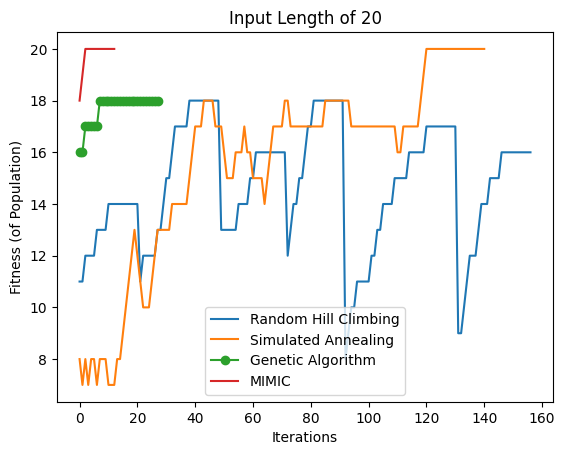

time for random hill-climbing is 0.0042629241943359375
time for simulated annealing is 0.0049970149993896484
time for genetic algorithm is 0.5528740882873535
time for mimic is 2.596932888031006


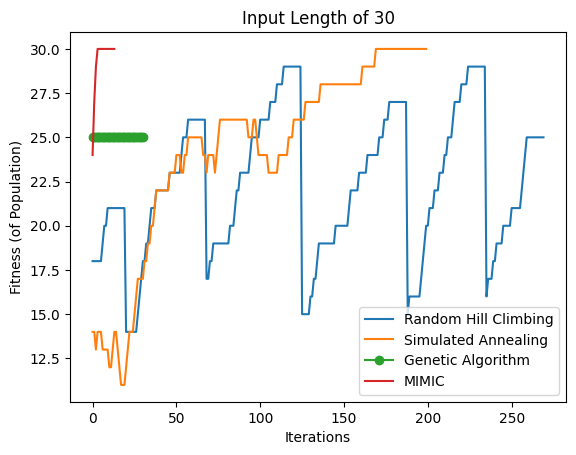

time for random hill-climbing is 0.0068280696868896484
time for simulated annealing is 0.007349967956542969
time for genetic algorithm is 0.610159158706665
time for mimic is 5.911150932312012


In [76]:
#2- sum of the 1 values
#iterate to keep it simple
lengths=[5,10,20,30]
for length in lengths:
    fitness_fn2= mlrose.OneMax()
    optprob= mlrose.DiscreteOpt(length,fitness_fn2)
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211, max_attempts=length)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, mutation_prob= 0.15, max_attempts= length, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob,  curve=True, random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve, '-o')
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Input Length of " + str(length))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1


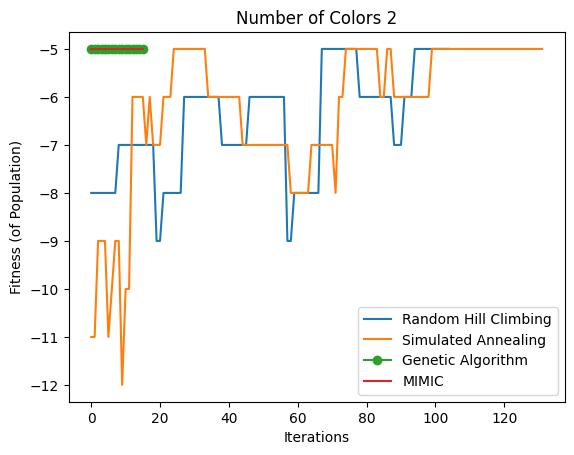

time for random hill-climbing is 0.0033168792724609375
time for simulated annealing is 0.0040740966796875
time for genetic algorithm is 0.2950930595397949
time for mimic is 1.0249440670013428


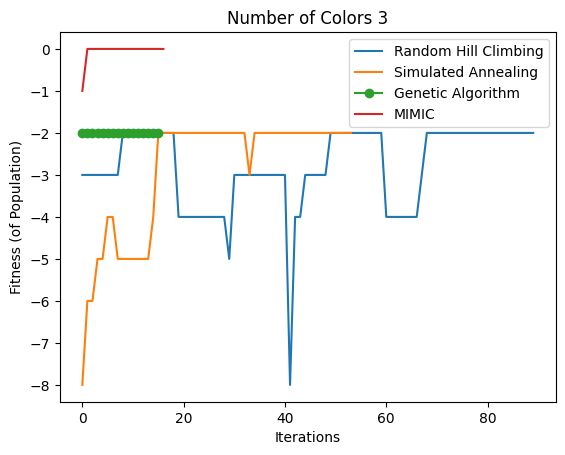

time for random hill-climbing is 0.0031061172485351562
time for simulated annealing is 0.0034019947052001953
time for genetic algorithm is 0.3757610321044922
time for mimic is 1.0025980472564697


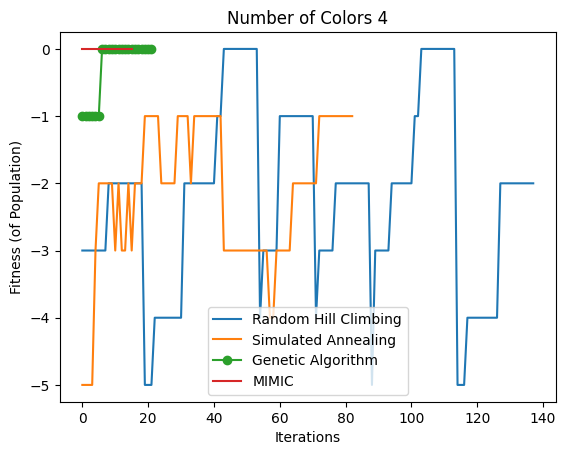

time for random hill-climbing is 0.004230976104736328
time for simulated annealing is 0.0031299591064453125
time for genetic algorithm is 0.4800260066986084
time for mimic is 0.8940379619598389


In [84]:
#MIMIC
#3- maxKcolor
length3=10
edges= [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,0), (0,8), (8,1), (8,2), (8,5), (8,6), (8,7), (9, 2), (9,3), (9,4), (9,5)]
fitness_fn3= mlrose.MaxKColor(edges)
optprob=mlrose.DiscreteOpt(length3,fitness_fn3, maximize=False, max_val=2)
max_vals=[2,3,4]
for val in max_vals:
    optprob=mlrose.DiscreteOpt(length3,fitness_fn3, maximize=False, max_val=val)
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, pop_size= pop, mutation_prob= 0.1, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob, pop_size= pop, curve=True, max_attempts= 15, random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve, '-o')
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Number of Colors " + str(val))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1


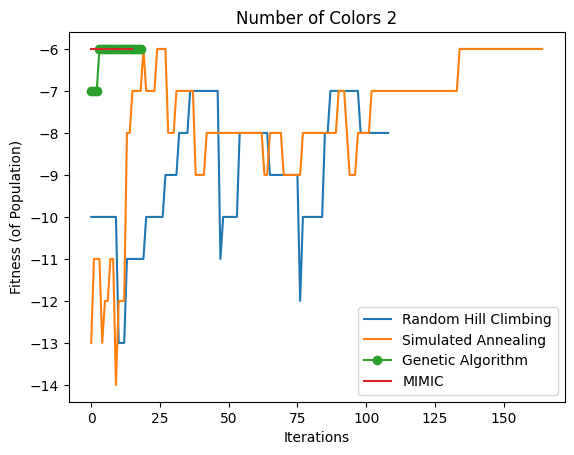

time for random hill-climbing is 0.003770112991333008
time for simulated annealing is 0.0061187744140625
time for genetic algorithm is 0.36714816093444824
time for mimic is 1.781775951385498


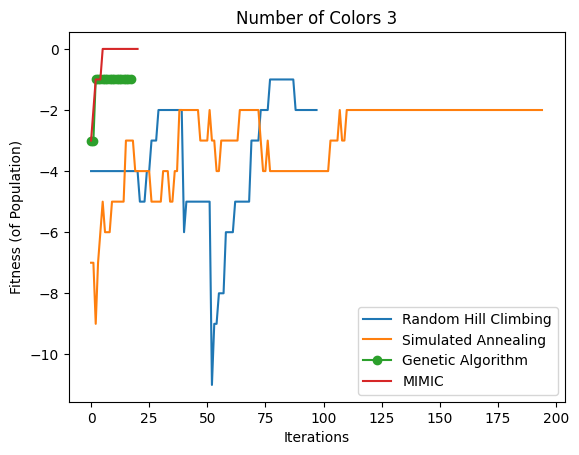

time for random hill-climbing is 0.003515958786010742
time for simulated annealing is 0.008163928985595703
time for genetic algorithm is 0.4300248622894287
time for mimic is 2.3428473472595215


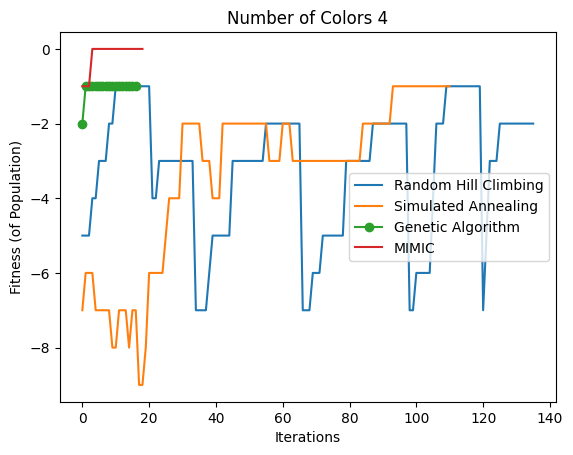

time for random hill-climbing is 0.004705667495727539
time for simulated annealing is 0.004687309265136719
time for genetic algorithm is 0.3981969356536865
time for mimic is 2.184008836746216


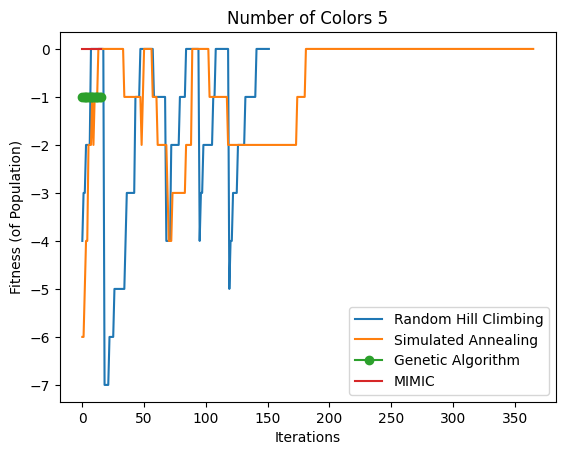

time for random hill-climbing is 0.0048160552978515625
time for simulated annealing is 0.01666998863220215
time for genetic algorithm is 0.35497498512268066
time for mimic is 1.723344087600708


In [87]:
#MIMIC
#3- maxKcolor
length3=14
edges= [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,0), (0,8), (8,1), (8,2), (8,5), (8,6), (8,7), (9, 2), (9,3), (9,4), (9,5), (10,13), (13,4), (12,1), (1,11), (11,12), (6,12)]
fitness_fn3= mlrose.MaxKColor(edges)
optprob=mlrose.DiscreteOpt(length3,fitness_fn3, maximize=False, max_val=2)
max_vals=[2,3,4,5]
for val in max_vals:
    optprob=mlrose.DiscreteOpt(length3,fitness_fn3, maximize=False, max_val=val)
    time0=time.time()
    [beststaterhc, bestfitrhc, rhccurve]= mlrose.random_hill_climb(optprob, restarts=5, curve=True, random_state=215)
    time1=time.time()
    [beststatesa, bestfitsa, sacurve]=mlrose.simulated_annealing(optprob, curve=True, random_state=211)
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, pop_size= pop, mutation_prob= 0.1, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob, pop_size= pop, curve=True, max_attempts= 15, random_state=212) #max_attempts=15,
    time4=time.time()

    #Graph it
    import matplotlib.pyplot as plt
    plt.plot(rhccurve)
    plt.plot(sacurve)
    plt.plot(gacurve, '-o')
    plt.plot(mimiccurve)
    plt.legend(["Random Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"])
    plt.xlabel("Iterations")
    plt.ylabel("Fitness (of Population)")
    plt.title("Number of Colors " + str(val))
    plt.show()

    #Time performance
    rhctime=time1-time0
    satime=time2-time1
    gatime= time3-time2
    mimictime=time4-time3
    print("time for random hill-climbing is " + str(rhctime))
    print("time for simulated annealing is " + str(satime))
    print("time for genetic algorithm is " + str(gatime))
    print("time for mimic is " + str(mimictime))
    n+=1


0.0
2.0
0.0
1.0
0.0
[0.0, 2.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


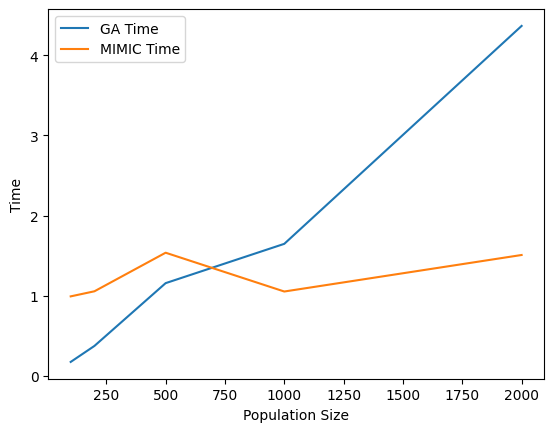

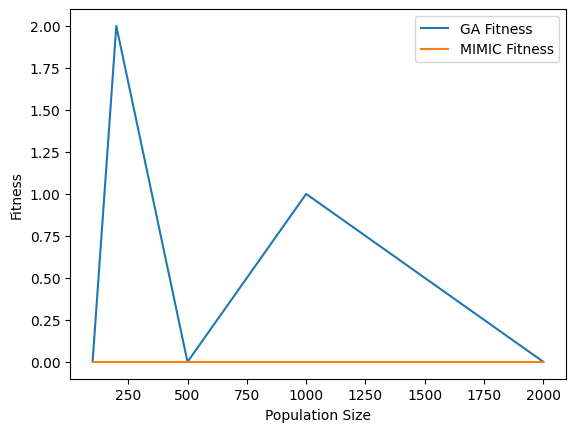

In [103]:
#MIMIC
#3- maxKcolor
length3=10
edges= [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,0), (0,8), (8,1), (8,2), (8,5), (8,6), (8,7), (9, 2), (9,3), (9,4), (9,5)]
fitness_fn3= mlrose.MaxKColor(edges)
optprob=mlrose.DiscreteOpt(length3,fitness_fn3, maximize=False, max_val=3)
pops=[100,200,500,1000,2000]
timega=[]
timemimic=[]
bestga=[]
bestmimic=[]
for pop in pops:
    time2=time.time()
    [beststatega, bestfitga, gacurve]=mlrose.genetic_alg(optprob, pop_size= pop, mutation_prob= 0.1, max_attempts= 15, curve=True, random_state=212) #max_attempts= 15,
    time3=time.time()
    [beststatemimic, bestfitmimic, mimiccurve]=mlrose.mimic(optprob, pop_size= pop, curve=True, max_attempts= 15, random_state=212) #max_attempts=15,
    time4=time.time()

    timeg=time3-time2
    timem=time4-time3

    timega.append(timeg)
    timemimic.append(timem)
    bestga.append(bestfitga)
    print(bestfitga)
    bestmimic.append(bestfitmimic)

print(bestga)
print(bestmimic)

plt.plot(pops, timega, pops, timemimic)
plt.legend(["GA Time", "MIMIC Time"])
plt.xlabel("Population Size")
plt.ylabel("Time")
plt.show()
plt.plot(pops, bestga, pops, bestmimic)#, pops, bestga)
plt.legend(["GA Fitness", "MIMIC Fitness"])
plt.xlabel("Population Size")
plt.ylabel("Fitness")
plt.show()